

## 项目 : 预测波士顿房价


欢迎来到 DSVC 《机器学习》研讨班第二周的项目！在此文件中，有些示例代码已经提供给你，但你还需要实现更多的功能来让项目成功运行。除非有明确要求，你无须修改任何已给出的代码。以**编程练习**开始的标题表示接下来的内容中有需要你必须实现的功能。每一部分都会有详细的指导，需要实现的部分也会在注释中以**TODO**标出。请仔细阅读所有的提示！

除了实现代码外，你还**必须**回答一些与项目和实现有关的问题。每一个需要你回答的问题都会以**'问题 X'**为标题。请仔细阅读每个问题，并且在问题后的**'回答'**文字框中写出完整的答案。你的项目将会根据你对问题的回答和撰写代码所实现的功能来进行评分。

>**提示：**Code 和 Markdown 区域可通过 **Shift + Enter** 快捷键运行。此外，Markdown可以通过双击进入编辑模式。

---
## 第一步. 导入数据
在这个项目中，你将利用马萨诸塞州波士顿郊区的房屋信息数据训练和测试一个模型，并对模型的性能和预测能力进行测试。通过该数据训练后的好的模型可以被用来对房屋做特定预测---尤其是对房屋的价值。对于房地产经纪等人的日常工作来说，这样的预测模型被证明非常有价值。

此项目的数据集来自[UCI机器学习知识库(数据集已下线)](https://archive.ics.uci.edu/ml/datasets.html)。波士顿房屋这些数据于1978年开始统计，共506个数据点，涵盖了麻省波士顿不同郊区房屋14种特征的信息。本项目对原始数据集做了以下处理：
- 有16个`'MEDV'` 值为50.0的数据点被移除。 这很可能是由于这些数据点包含**遗失**或**看不到的值**。
- 有1个数据点的 `'RM'` 值为8.78. 这是一个异常值，已经被移除。
- 对于本项目，房屋的`'RM'`， `'LSTAT'`，`'PTRATIO'`以及`'MEDV'`特征是必要的，其余不相关特征已经被移除。
- `'MEDV'`特征的值已经过必要的数学转换，可以反映35年来市场的通货膨胀效应。

运行下面区域的代码以载入波士顿房屋数据集，以及一些此项目所需的Python库。如果成功返回数据集的大小，表示数据集已载入成功。

In [1]:
# 载入此项目所需要的库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 检查你的Python版本
from sys import version_info
if version_info.major != 2 and version_info.minor != 7:
    raise Exception('请使用Python 2.7来完成此项目')
    
# 让可视化的结果在notebook中显示
%matplotlib inline

In [2]:
# 载入波士顿房屋的数据集
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
# 完成
print ("Boston housing dataset has {} data points with {} variables each.".format(*data.shape))

Boston housing dataset has 489 data points with 4 variables each.


__下面三张图的横坐标分别是：住宅平均房间数量、区域中被认为是低收入阶层的比率和镇上学生与教师数量比例，纵坐标是房屋的中值价格__

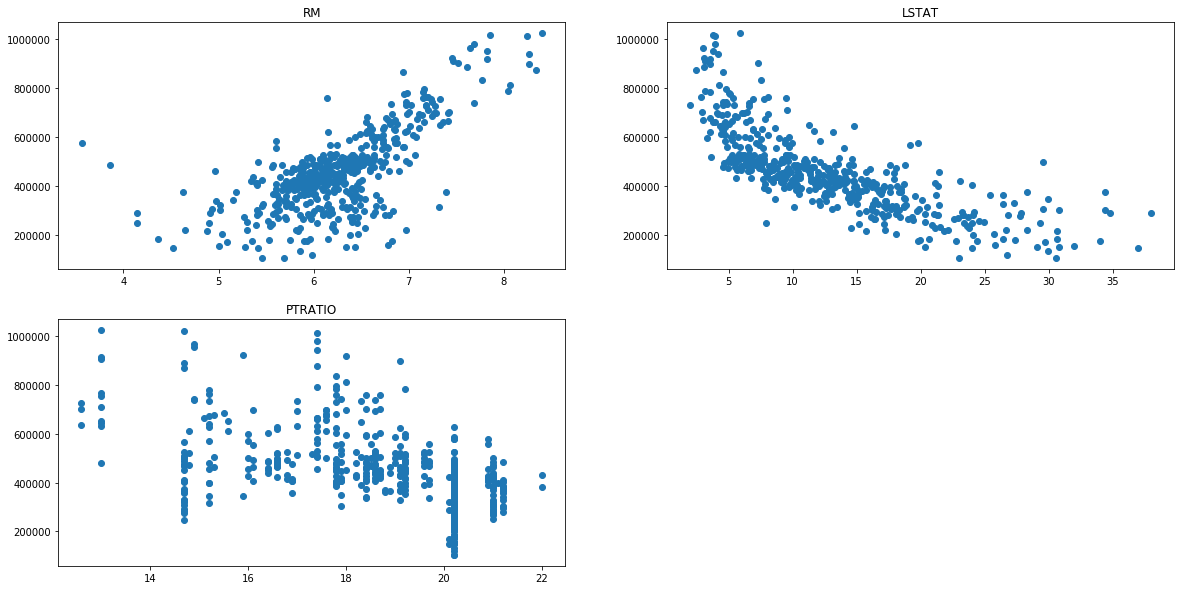

In [3]:
plt.figure(figsize=(20, 10))
plt.subplot(2, 2, 1)
plt.title('RM')
plt.scatter(features.get_values()[:, 0], prices.get_values())
plt.subplot(2, 2, 2)
plt.title('LSTAT')
plt.scatter(features.get_values()[:, 1], prices.get_values())
plt.subplot(2, 2, 3)
plt.title('PTRATIO')
plt.scatter(features.get_values()[:, 2], prices.get_values())

---
## 第二步. 分析数据
在项目的第一个部分，你会对波士顿房地产数据进行初步的观察并给出你的分析。通过对数据的探索来熟悉数据可以让你更好地理解和解释你的结果。

由于这个项目的最终目标是建立一个预测房屋价值的模型，我们需要将数据集分为**特征(features)**和**目标变量(target variable)**。
- **特征** `'RM'`， `'LSTAT'`，和 `'PTRATIO'`，给我们提供了每个数据点的数量相关的信息。
- **目标变量**：` 'MEDV'`，是我们希望预测的变量。

他们分别被存在`features`和`prices`两个变量名中。

### 编程练习 1：基础统计运算
你的第一个编程练习是计算有关波士顿房价的描述统计数据。我们已为你导入了` numpy `，你需要使用这个库来执行必要的计算。这些统计数据对于分析模型的预测结果非常重要的。
在下面的代码中，你要做的是：
- 计算`prices`中的`'MEDV'`的最小值、最大值、均值、中值和标准差；
- 将运算结果储存在相应的变量中。

In [4]:
#TODO 1

#目标：计算价值的最小值
minimum_price = None

#目标：计算价值的最大值
maximum_price = None

#目标：计算价值的平均值
mean_price = None

#目标：计算价值的中值
median_price = None

#目标：计算价值的标准差
std_price = None

maximum_price = np.max(prices)
minimum_price = np.min(prices)
mean_price = np.mean(prices)
median_price = np.median(prices)
std_price = np.std(prices)

#目标：输出计算的结果
print ("Statistics for Boston housing dataset:\n")
print ("Minimum price: ${:,.2f}".format(minimum_price))
print ("Maximum price: ${:,.2f}".format(maximum_price))
print ("Mean price: ${:,.2f}".format(mean_price))
print ("Median price ${:,.2f}".format(median_price))
print ("Standard deviation of prices: ${:,.2f}".format(std_price))

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13


### 问题 1 - 特征观察

如前文所述，本项目中我们关注的是其中三个值:`'RM'`、`'LSTAT'` 和`'PTRATIO'`，对每一个数据点:
- `'RM'` 是该地区中每个房屋的平均房间数量；
- `'LSTAT'` 是指该地区有多少百分比的房东属于是低收入阶层（有工作但收入微薄）；
- `'PTRATIO'` 是该地区的中学和小学里，学生和老师的数目比（`学生/老师`）。

_凭直觉，上述三个特征中对每一个来说，你认为增大该特征的数值，`'MEDV'`的值会是**增大**还是**减小**呢？每一个答案都需要你给出理由。_

**提示：**你预期一个`'RM'` 值是6的房屋跟`'RM'` 值是7的房屋相比，价值更高还是更低呢？

### 问题 1 - 回答：增大RM，MEDV会增大，房间的品骏数量增大，就会导致房价上涨；增大LSTAT，MEDV会减小，因为低收入家庭虽然收入较少，需要靠租房来获取利润，但是他们经济少，无法花费较大资金来买房，所以房价会减小；增大PTRATIO，MEDV会基本不变化，学生的数量增大，导致学区房价格上涨，但是学区房会高于低收入阶层，不会高于高收入阶层，处于中间状态。

### 编程练习 2: 数据分割与重排
接下来，你需要把波士顿房屋数据集分成训练和测试两个子集。通常在这个过程中，数据也会被重排列，以消除数据集中由于顺序而产生的偏差。
在下面的代码中，你需要

将`features`和`prices`的数据都分成用于训练的数据子集和用于测试的数据子集。
  - 分割比例为：80%的数据用于训练，20%用于测试；
  - 选定一个数值以设定 `random_seed` ，这会确保结果的一致性；
  - 提示：打乱训练集和测试集的数据时，只要创建一个 list，然后用这个 list 分别应用于 X，y 生成训练集和测试集。
 ```
 test = np.array([1, 3, 5, 7, 9, 11])
 """ test[[0,1,2]] = [1, 3, 5]
 """ test[[1,3,5]] = [3, 7, 11]
 ```
  
  可能需要用到的函数
  - (numpy.random.seed)[https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.seed.html]
  - (numpy.random.shuffle)[https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.shuffle.html]

In [6]:
LEN, seed = 489, 666

def generate_train_and_test(X, y):
    np.random.seed(seed)
    shuffle_index = np.random.permutation(LEN)#返回一个乱序列
    test_size = int(LEN * 0.2)
    test_index = shuffle_index[:test_size] #返回测试集的索引序列
    train_index = shuffle_index[test_size:] #返回训练集的索引序列
    X_test = X[test_index]
    y_test = y[test_index]
    X_train = X[train_index]
    y_train = y[train_index]
    return X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = generate_train_and_test(features.values, prices.values)
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

print(X_train.shape)
print(y_train.shape)

392
97
392
97
(392L, 3L)
(392L,)


### 问题 2 - 训练及测试
*将数据集按一定比例分为训练用的数据集和测试用的数据集对学习算法有什么好处？*

*如果果用模型已经见过的数据，例如部分训练集数据进行测试，又有什么坏处？*

**提示：** 如果没有数据来对模型进行测试，会出现什么问题？

### 问题 2 - 回答:测试模型的好坏，如果不合适，及时调整参数；如果没有测试集，则可能会出现过拟合或者过拟合现象。

---
## 第三步. 模型衡量标准

### 编程练习3：定义衡量标准
如果不能对模型的训练和测试的表现进行量化地评估，我们就很难衡量模型的好坏。通常我们会定义一些衡量标准，这些标准可以通过对某些误差或者拟合程度的计算来得到。在这个项目中，你将通过运算[*决定系数*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination) R<sup>2</sup> 来量化模型的表现。模型的决定系数是回归分析中十分常用的统计信息，经常被当作衡量模型预测能力好坏的标准。

R<sup>2</sup>的数值范围从0至1，表示**目标变量**的预测值和实际值之间的相关程度平方的百分比。一个模型的R<sup>2</sup> 值为0还不如直接用**平均值**来预测效果好；而一个R<sup>2</sup> 值为1的模型则可以对目标变量进行完美的预测。从0至1之间的数值，则表示该模型中目标变量中有百分之多少能够用**特征**来解释。_模型也可能出现负值的R<sup>2</sup>，这种情况下模型所做预测有时会比直接计算目标变量的平均值差很多。_

在下方代码的 `performance_metric` 函数中，你要实现：
- 计算 `y_true` 和 `y_predict`的R<sup>2</sup>值，作为对其表现的评判，可参考[`r2_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html)。
- 将他们的表现评分储存到`score`变量中。


In [7]:
# TODO 3

# 提示： 导入r2_score
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """计算并返回预测值相比于预测值的分数"""

    score  = r2_score(y_true,y_predict,sample_weight=None,multioutput=None)

    return score

### 问题 3 - 拟合程度

假设一个数据集有五个数据且一个模型做出下列目标变量的预测：

| 真实数值 | 预测数值 |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |
*你觉得这个模型已成功地描述了目标变量的变化吗？如果成功，请解释为什么，如果没有，也请给出原因。*  

**提示**：运行下方的代码，使用`performance_metric`函数来计算模型的决定系数。

In [8]:
# 计算这个模型的预测结果的决定系数
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print "Model has a coefficient of determination, R^2, of {:.3f}.".format(score)

Model has a coefficient of determination, R^2, of 0.923.


### 问题 3 - 回答:是，模型的预测值和真实值之间的相关程度达到了0.92，可以近似描述了目标变量的变化。

## 第四步. 模型训练
### 编程练习 4：训练回归模型
在这个练习中，你将需要将所学到的内容整合，使用 **gradient descent 算法**训练一个线性回归模型。你可以尝试使用自己构建的多项式特征和 L1、L2 Loss，进行实验后，讨论他们是否对你的模型有效，并通过前面定义的 `performance_metric` 量化他们的提升效果。

在这里，你不能使用现成 package，不能使用额外 data。


In [9]:
# TODO 4
# 特征放缩　　　
def featureScale(X):
    resX = np.empty(shape=X.shape, dtype=float)
    mean = np.array([np.min(X[:, i]) for i in range(X.shape[1])])
    scale = np.array([(np.max(X[:, i] - np.min(X[:, i]))) for i in range(X.shape[1])])
    for i in range(X.shape[1]):
        #对样本的每一列特征处理
        resX[:, i] = (X[:, i] - mean[i]) / scale[i]
    return resX

# 定义计算目标函数,这里目标函数是均方误差ＭＳＥ
def J(X, theta, y):
    m = len(y)
#     R2 = lamda * np.sum(np.square(theta))
    temp = np.sum((X.dot(theta) - y) ** 2) 
    return temp / (2 * m)

# 定义计算求目标函数的梯度　　　　
def graJ(X, theta, y):
    gra = np.empty(len(theta)) # 先给导数向量开空间，我们要对每个theta求偏导
    gra[0] = np.sum(X.dot(theta) - y) #计算第一个特征对应的theta求偏导，因为X1 = 1
    for i in range(1, len(theta)):
        gra[i] = (X.dot(theta) - y).dot(X[:, i]) #可以看成是两个向量的点乘，第二个向量对应着全部样本的第ｉ列特征
    
    return gra / len(X)

#　梯度下降实现(学习率默认为0.01,默认最多迭代10000次)
def gradientDescent(X, theta, y, n_iters=10000, alpha=0.01):
    
    for i in range(n_iters):
        gra = graJ(X, theta, y)
        last_theta = theta
        theta = theta - alpha * gra 
        print(J(X, theta, y))
    
    return theta

def train(X, y):
    X_train_plus = np.hstack([np.ones((len(X), 1)), X])
    init_theta = np.zeros(X_train_plus.shape[1]) #初始化theta向量，长度对应样本中的特征数＋１
    theta = gradientDescent(X_train_plus, init_theta, y)#在原来的样本矩阵前加一列特征，特征值都为１,即X1
    return theta

def predict(X_test, theta):
    X_test_plus = np.hstack([np.ones((len(X_test), 1)), X_test])
    return X_test_plus.dot(theta)


#　测试模型
X_train = featureScale(X_train)
print(X_train)
theta = train(X_train, y_train)
print(theta)
X_test = featureScale(X_test)
y_predict = predict(X_test, theta)
print(y_predict.shape)
score = performance_metric(y_test, y_predict)
print(score)

[[0.66163656 0.28571429 0.89361702]
 [0.59128587 0.524      0.80851064]
 [0.541339   0.13114286 0.40425532]
 ...
 [0.59086079 0.45171429 0.80851064]
 [0.38002125 0.50828571 0.80851064]
 [0.43188098 0.30057143 0.69148936]]
112834917750.78983
109323053446.91295
105938143588.71347
102675580711.86528
99530924588.55772
96499896157.30923
93578371673.11101
90762377069.90256
88048082527.67297
85431797236.76003
82909964352.1897
80479156131.15805
78136069247.00818
75877520273.29555
73700441331.76868
71601875898.31474
69578974761.13719
67628992125.6393
65749281860.68886
63937293881.13225
62190570661.61256
60506743876.925644
58883531164.32118
57318733003.32272
55810229708.80087
54355978533.188835
52954010873.87914
51602429581.98336
50299406368.77588
49043179306.276085
47832050418.55189
46664383360.45171
45538601180.591736
44453184165.53997
43406667762.2499
42397640575.90382
41424742440.42825
40486662559.04413
39582137712.30925
38709950531.20364
37868927832.896614
37057939016.92063
36275894519.5592

10966849411.215752
10958625213.909645
10950410640.367617
10942205679.270334
10934010319.313536
10925824549.207966
10917648357.67928
10909481733.467964
10901324665.329271
10893177142.033134
10885039152.364098
10876910685.12125
10868791729.118153
10860682273.182777
10852582306.157436
10844491816.89872
10836410794.277447
10828339227.178587
10820277104.501226
10812224415.158482
10804181148.07748
10796147292.199276
10788122836.478815
10780107769.884886
10772102081.400064
10764105760.02066
10756118794.75669
10748141174.631807
10740172888.683279
10732213925.961937
10724264275.532124
10716323926.471663
10708392867.87182
10700471088.837257
10692558578.486
10684655325.949392
10676761320.37207
10668876550.911917
10661001006.740032
10653134677.0407
10645277551.01135
10637429617.862526
10629590866.817856
10621761287.11402
10613940868.00071
10606129598.740627
10598327468.609413
10590534466.895649
10582750582.90082
10574975805.939283
10567210125.33824
10559453530.437717
10551706010.590528
10543967555

7539897854.878332
7535682077.1742325
7531471228.296379
7527265302.473796
7523064293.942274
7518868196.944353
7514677005.72931
7510490714.553161
7506309317.678642
7502132809.375219
7497961183.919059
7493794435.593037
7489632558.68672
7485475547.496363
7481323396.324906
7477176099.48195
7473033651.283772
7468896046.053295
7464763278.120093
7460635341.820385
7456512231.497016
7452393941.499459
7448280466.183808
7444171799.912757
7440067937.055613
7435968871.988269
7431874599.093202
7427785112.759474
7423700407.382723
7419620477.365132
7415545317.115458
7411474921.04899
7407409283.587572
7403348399.159569
7399292262.199874
7395240867.149902
7391194208.457574
7387152280.577307
7383115077.97002
7379082595.10312
7375054826.450481
7371031766.492464
7367013409.715885
7362999750.614017
7358990783.686581
7354986503.439742
7350986904.386097
7346991981.044671
7343001727.940906
7339016139.606649
7335035210.580165
7331058935.406104
7327087308.635505
7323120324.825792
7319157978.540763
7315200264.3505

5815483980.792311
5813283241.714099
5811085072.275945
5808889469.469617
5806696430.290409
5804505951.737133
5802318030.812111
5800132664.521182
5797949849.873685
5795769583.88247
5793591863.563874
5791416685.937735
5789244048.027379
5787073946.85962
5784906379.46475
5782741342.876542
5780578834.132239
5778418850.272558
5776261388.341679
5774106445.387239
5771954018.460342
5769804104.61554
5767656700.9108305
5765511804.407662
5763369412.170923
5761229521.268936
5759092128.773462
5756957231.7596855
5754824827.306222
5752694912.495102
5750567484.411773
5748442540.145104
5746320076.787365
5744200091.434233
5742082581.184786
5739967543.1414995
5737854974.410245
5735744872.100278
5733637233.324242
5731532055.19816
5729429334.841435
5727329069.376843
5725231255.930527
5723135891.631995
5721042973.61412
5718952499.013131
5716864464.968608
5714778868.623486
5712695707.124039
5710614977.619886
5708536677.263989
5706460803.212635
5704387352.625448
5702316322.665376
5700247710.498686
5698181513.29

4840719543.25174
4839655789.328451
4838593274.15997
4837531996.29657
4836471954.290215
4835413146.69457
4834355572.064991
4833299228.958528
4832244115.933916
4831190231.551584
4830137574.373642
4829086142.963886
4828035935.887793
4826986951.712518
4825939189.006898
4824892646.341442
4823847322.288337
4822803215.421436
4821760324.316269
4820718647.550029
4819678183.701576
4818638931.351436
4817600889.081796
4816564055.476502
4815528429.121062
4814494008.602636
4813460792.510041
4812428779.433745
4811397967.96587
4810368356.700183
4809339944.232095
4808312729.15867
4807286710.0786085
4806261885.592255
4805238254.301591
4804215814.810235
4803194565.723443
4802174505.648103
4801155633.192731
4800137946.967477
4799121445.584119
4798106127.656057
4797091991.798315
4796079036.627543
4795067260.762005
4794056662.821587
4793047241.427792
4792038995.2037325
4791031922.774136
4790026022.765344
4789021293.805299
4788017734.523556
4787015343.551274
4786014119.521212
4785014061.067733
4784015166.826

4424337209.549106
4423757552.347208
4423178567.464143
4422600254.113461
4422022611.50963
4421445638.86804
4420869335.405002
4420293700.337742
4419718732.8844
4419144432.264039
4418570797.696628
4417997828.403053
4417425523.605116
4416853882.525524
4416282904.387897
4415712588.416763
4415142933.837562
4414573939.876635
4414005605.761233
4413437930.719509
4412870913.980523
4412304554.774239
4411738852.331512
4411173805.884113
4410609414.6647005
4410045677.906837
4409482594.844982
4408920164.714491
4408358386.751613
4407797260.193492
4407236784.278171
4406676958.2445755
4406117781.332528
4405559252.7827425
4405001371.836817
4404444137.737241
4403887549.727388
4403331607.051523
4402776308.954794
4402221654.683225
4401667643.483735
4401114274.604116
4400561547.293046
4400009460.800078
4399458014.3756485
4398907207.271069
4398357038.738528
4397807508.03109
4397258614.402691
4396710357.108147
4396162735.403142
4395615748.544233
4395069395.788846
4394523676.395277
4393978589.622692
4393434134.

4185967649.6849566
4185663646.5775886
4185359993.4536557
4185056689.904126
4184753735.5204425
4184451129.894529
4184148872.6187825
4183846963.286084
4183545401.489786
4183244186.823719
4182943318.8821893
4182642797.259977
4182342621.552337
4182042791.3550005
4181743306.2641664
4181444165.876513
4181145369.789187
4180846917.5998063
4180548808.9064612
4180251043.307713
4179953620.4025927
4179656539.790601
4179359801.071706
4179063403.8463445
4178767347.715423
4178471632.2803135
4178176257.142855
4177881221.905353
4177586526.1705794
4177292169.54177
4176998151.622622
4176704472.0173054
4176411130.330445
4176118126.1671333
4175825459.132922
4175533128.8338275
4175241134.876326
4174949476.8673525
4174658154.414308
4174367167.1250463
4174076514.6078854
4173786196.4716
4173496212.325421
4173206561.7790403
4172917244.442603
4172628259.926717
4172339607.8424373
4172051287.8012815
4171763299.4152174
4171475642.296671
4171188316.05852
4170901320.314093
4170614654.6771765
4170328318.762004
4170042

4077636395.992169
4077456580.836066
4077276970.595113
4077097565.0301085
4076918363.902135
4076739366.972555
4076560574.003009
4076381984.7554145
4076203598.9919724
4076025416.475158
4075847436.967727
4075669660.2327113
4075492086.033421
4075314714.133442
4075137544.296641
4074960576.287154
4074783809.8693995
4074607244.8080707
4074430880.868133
4074254717.8148293
4074078755.41368
4073902993.430473
4073727431.6312766
4073552069.7824306
4073376907.6505475
4073201945.0025163
4073027181.605493
4072852617.2269125
4072678251.634479
4072504084.5961676
4072330115.880228
4072156345.255178
4071982772.4898076
4071809397.3531785
4071636219.6146226
4071463239.0437393
4071290455.4104004
4071117868.4847474
4070945478.037188
4070773283.8384013
4070601285.6593337
4070429483.2712
4070257876.445483
4070086464.9539323
4069915248.5685654
4069744227.0616665
4069573400.2057867
4069402767.773742
4069232329.5386176
4069062085.273759
4068892034.752783
4068722177.7495646
4068552514.0382514
4068383043.3932495
40

4004691823.838271
4004594468.7708926
4004497222.4560084
4004400084.76698
4004303055.5773125
4004206134.7606635
4004109322.190836
4004012617.741782
4003916021.2876015
4003819532.7025385
4003723151.860988
4003626878.6374917
4003530712.906735
4003434654.543553
4003338703.4229264
4003242859.4199805
4003147122.40999
4003051492.2683735
4002955968.8706937
4002860552.0926633
4002765241.8101377
4002670037.8991165
4002574940.235748
4002479948.696321
4002385063.157273
4002290283.4951844
4002195609.5867796
4002101041.3089275
4002006578.5386434
4001912221.153081
4001817969.029545
4001723822.045479
4001629780.078469
4001535843.0062475
4001442010.706689
4001348283.0578103
4001254659.9377713
4001161141.2248764
4001067726.7975693
4000974416.534436
4000881210.314209
4000788108.015757
4000695109.5180926
4000602214.700372
4000509423.4418907
4000416735.622087
4000324151.120538
4000231669.816962
4000139291.591223
4000047016.323317
3999954843.8933864
3999862774.1817155
3999770807.068722
3999678942.4349704
39

3968034586.7223535
3967977682.57983
3967920840.156498
3967864059.380751
3967807340.1810656
3967750682.486003
3967694086.224206
3967637551.3244004
3967581077.715399
3967524665.326094
3967468314.085463
3967412023.9225664
3967355794.7665467
3967299626.5466294
3967243519.192124
3967187472.6324215
3967131486.7969956
3967075561.6154046
3967019697.017285
3966963892.932359
3966908149.290431
3966852466.0213847
3966796843.055188
3966741280.321892
3966685777.7516255
3966630335.274605
3966574952.8211217
3966519630.321553
3966464367.7063565
3966409164.906071
3966354021.8513184
3966298938.4727983
3966243914.7012925
3966188950.4676676
3966134045.702864
3966079200.337909
3966024414.3039083
3965969687.5320477
3965915019.9535947
3965860411.499894
3965805862.102377
3965751371.692549
3965696940.2019997
3965642567.562394
3965588253.705483
3965533998.5630913
3965479802.0671287
3965425664.1495814
3965371584.7425156
3965317563.7780776
3965263601.188493
3965209696.906067
3965155850.863182
3965102062.9923034
39

3945725049.5330706
3945691856.6265388
3945658698.0005207
3945625573.6154914
3945592483.4319806
3945559427.4105597
3945526405.511847
3945493417.6965065
3945460463.9252505
3945427544.158832
3945394658.3580565
3945361806.4837704
3945328988.4968686
3945296204.3582892
3945263454.029019
3945230737.470088
3945198054.6425724
3945165405.507593
3945132790.026321
3945100208.1599646
3945067659.869783
3945035145.1170816
3945002663.8632064
3944970216.0695534
3944937801.6975594
3944905420.7087083
3944873073.0645304
3944840758.7265987
3944808477.656533
3944776229.8159957
3944744015.1666956
3944711833.670386
3944679685.2888665
3944647569.9839764
3944615487.7176046
3944583438.451684
3944551422.148189
3944519438.769141
3944487488.2766056
3944455570.632692
3944423685.799552
3944391833.7393856
3944360014.4144335
3944328227.786985
3944296473.8193665
3944264752.473954
3944233063.713167
3944201407.4994655
3944169783.7953577
3944138192.5633917
3944106633.766162
3944075107.366307
3944043613.326506
3944012151.60

3932936297.8712683
3932915913.849979
3932895549.4040484
3932875204.511141
3932854879.14894
3932834573.29516
3932814286.9275365
3932794020.0238347
3932773772.561847
3932753544.519388
3932733335.8742986
3932713146.604449
3932692976.6877317
3932672826.1020656
3932652694.8254004
3932632582.835701
3932612490.110968
3932592416.629224
3932572362.3685155
3932552327.3069177
3932532311.4225287
3932512314.6934767
3932492337.097908
3932472378.614001
3932452439.219956
3932432518.894002
3932412617.6143885
3932392735.359397
3932372872.107327
3932353027.8365097
3932333202.525297
3932313396.152067
3932293608.6952276
3932273840.133206
3932254090.444456
3932234359.6074586
3932214647.6007195
3932194954.402767
3932175279.9921575
3932155624.3474708
3932135987.4473104
3932116369.270309
3932096769.795121
3932077189.000425
3932057626.864927
3932038083.367356
3932018558.4864664
3931999052.2010384
3931979564.489876
3931960095.3318076
3931940644.7056866
3931921212.5903926
3931901798.964826
3931882403.8079176
3931

3924250760.155408
3924238302.789984
3924225856.022448
3924213419.8409324
3924200994.233579
3924188579.18855
3924176174.694017
3924163780.7381673
3924151397.3092003
3924139024.395333
3924126661.9847894
3924114310.065812
3924101968.6266594
3924089637.6555977
3924077317.1409097
3924065007.070892
3924052707.4338546
3924040418.218121
3924028139.4120283
3924015871.003928
3924003612.982184
3923991365.335174
3923979128.0512886
3923966901.118933
3923954684.526528
3923942478.262501
3923930282.315302
3923918096.673386
3923905921.325228
3923893756.259312
3923881601.4641385
3923869456.9282203
3923857322.640082
3923845198.5882616
3923833084.7613153
3923820981.147806
3923808887.7363143
3923796804.5154305
3923784731.4737644
3923772668.599933
3923760615.8825684
3923748573.310315
3923736540.8718343
3923724518.5557976
3923712506.350888
3923700504.2458067
3923688512.229263
3923676530.289984
3923664558.4167047
3923652596.5981793
3923640644.8231688
3923628703.0804505
3923616771.358816
3923604849.647069
3923

3919004981.5328836
3918996682.329525
3918988389.1242375
3918980101.9105034
3918971820.6818094
3918963545.4316545
3918955276.1535397
3918947012.8409786
3918938755.487488
3918930504.0865965
3918922258.6318374
3918914019.1167502
3918905785.5348864
3918897557.8798018
3918889336.1450605
3918881120.3242326
3918872910.4108973
3918864706.398643
3918856508.2810607
3918848316.051753
3918840129.704328
3918831949.2324014
3918823774.6295977
3918815605.8895473
3918807443.0058875
3918799285.9722643
3918791134.782331
3918782989.4297485
3918774849.908183
3918766716.2113104
3918758588.3328133
3918750466.2663813
3918742350.0057106
3918734239.544506
3918726134.8764796
3918718035.9953494
3918709942.894842
3918701855.5686903
3918693774.010638
3918685698.214429
3918677628.1738205
3918669563.882575
3918661505.3344626
3918653452.523259
3918645405.4427505
3918637364.086726
3918629328.448986
3918621298.523336
3918613274.3035865
3918605255.7835617
3918597242.957086
3918589235.8179965
3918581234.3601303
3918573238

3915564075.8200955
3915558052.591346
3915552032.9334316
3915546016.842645
3915540004.315279
3915533995.3476353
3915527989.9360166
3915521988.076731
3915515989.7660913
3915509995.0004144
3915504003.776021
3915498016.089236
3915492031.936389
3915486051.3138123
3915480074.217845
3915474100.6448307
3915468130.591113
3915462164.053043
3915456201.026976
3915450241.509271
3915444285.4962916
3915438332.984404
3915432383.9699802
3915426438.449394
3915420496.4190288
3915414557.8752666
3915408622.814494
3915402691.233108
3915396763.1275
3915390838.494074
3915384917.3292336
3915378999.629389
3915373085.3909507
3915367174.6103387
3915361267.2839727
3915355363.408278
3915349462.9796867
3915343565.9946303
3915337672.4495463
3915331782.3408775
3915325895.6650715
3915320012.418576
3915314132.597847
3915308256.1993413
3915302383.2195225
3915296513.6548567
3915290647.5018144
3915284784.756871
3915278925.4165053
3915273069.4771976
3915267216.935437
3915261367.787716
3915255522.030526
3915249679.6603675
39

3913009893.2353835
3913005232.788796
3913000574.5381036
3912995918.4811773
3912991264.61589
3912986612.9401197
3912981963.451742
3912977316.1486382
3912972671.028694
3912968028.0897927
3912963387.3298216
3912958748.7466717
3912954112.338238
3912949478.1024113
3912944846.0370927
3912940216.1401815
3912935588.4095798
3912930962.8431907
3912926339.438925
3912921718.1946898
3912917099.108397
3912912482.177961
3912907867.4013
3912903254.7763324
3912898644.300979
3912894035.9731646
3912889429.790815
3912884825.7518578
3912880223.8542256
3912875624.09585
3912871026.4746685
3912866430.988619
3912861837.635641
3912857246.4136777
3912852657.320674
3912848070.354577
3912843485.5133367
3912838902.794904
3912834322.197237
3912829743.718289
3912825167.356022
3912820593.1083946
3912816020.973371
3912811450.94892
3912806883.033008
3912802317.2236056
3912797753.5186863
3912793191.9162245
3912788632.4141994
3912784075.010591
3912779519.7033806
3912774966.4905543
3912770415.370097
3912765866.3399997
3912

3911067637.147009
3911063796.5438347
3911059957.3737836
3911056119.6355915
3911052283.327998
3911048448.449742
3911044614.9995666
3911040782.976214
3911036952.378428
3911033123.204956
3911029295.4545436
3911025469.1259418
3911021644.217897
3911017820.729164
3911013998.658494
3911010178.004642
3911006358.766363
3911002540.9424148
3910998724.531555
3910994909.5325446
3910991095.9441442
3910987283.7651167
3910983472.9942265
3910979663.6302366
3910975855.6719174
3910972049.118036
3910968243.96736
3910964440.2186627
3910960637.870716
3910956836.9222937
3910953037.3721695
3910949239.219122
3910945442.4619265
3910941647.099365
3910937853.130218
3910934060.553265
3910930269.367291
3910926479.571082
3910922691.163422
3910918904.1431003
3910915118.508903
3910911334.2596226
3910907551.3940506
3910903769.9109797
3910899989.8092027
3910896211.087518
3910892433.7447205
3910888657.7796097
3910884883.190984
3910881109.9776444
3910877338.138394
3910873567.672038
3910869798.5773797
3910866030.853225
391

3908972744.6527066
3908969582.8414145
3908966421.908937
3908963261.8546267
3908960102.6778374
3908956944.377926
3908953786.954248
3908950630.406158
3908947474.733016
3908944319.9341774
3908941166.009002
3908938012.9568496
3908934860.7770786
3908931709.4690514
3908928559.0321283
3908925409.465671
3908922260.7690425
3908919112.941608
3908915965.9827294
3908912819.8917723
3908909674.668103
3908906530.311086
3908903386.8200912
3908900244.194483
3908897102.433631
3908893961.5369053
3908890821.5036726
3908887682.333307
3908884544.0251765
3908881406.5786543
3908878269.9931135
3908875134.2679243
3908871999.402464
3908868865.3961043
3908865732.2482224
3908862599.958193
3908859468.5253925
3908856337.9491982
3908853208.228989
3908850079.364142
3908846951.3540363
3908843824.198053
3908840697.895573
3908837572.4459763
3908834447.8486443
3908831324.1029606
3908828201.2083087
3908825079.1640725
3908821957.9696355
3908818837.6243834
3908815718.127703
3908812599.47898
3908809481.6776023
3908806364.7229

3907260218.747715
3907257479.36496
3907254740.5809
3907252002.3951864
3907249264.8074727
3907246527.817409
3907243791.4246526
3907241055.628854
3907238320.4296713
3907235585.826756
3907232851.8197656
3907230118.408354
3907227385.592177
3907224653.3708897
3907221921.7441506
3907219190.7116165
3907216460.2729416
3907213730.427786
3907211001.175808
3907208272.516664
3907205544.4500136
3907202816.9755144
3907200090.092827
3907197363.801612
3907194638.101527
3907191912.9922338
3907189188.4733925
3907186464.5446634
3907183741.2057095
3907181018.4561925
3907178296.2957716
3907175574.7241125
3907172853.7408757
3907170133.3457255
3907167413.538326
3907164694.3183393
3907161975.685431
3907159257.6392646
3907156540.1795044
3907153823.305817
3907151107.0178676
3907148391.315322
3907145676.1978455
3907142961.6651063
3907140247.7167687
3907137534.352503
3907134821.5719748
3907132109.374852
3907129397.7608047
3907126686.7295
3907123976.280606
3907121266.413792
3907118557.128731
3907115848.42509
39071

### 问题 4 - 回归模型的优化
在最基础的回归模型上，你使用了什么办法来提升模型的效果，最后模型的性能是否得到了提升？如果提升了，请说出提升性能的原理，如果没有，请探究没有生效的原因。

### 问题 4 - 回答：使用梯度下降来优化线性函数的参数。选取一个确定的步长，通过对损失函数求导，更新参数的值，使损失函数的值最小，多次迭代，选取最优解。

## 第六步. 做出预测
当我们用数据训练出一个模型，它现在就可用于对新的数据进行预测。在决策树回归函数中，模型已经学会对新输入的数据*提问*，并返回对**目标变量**的预测值。你可以用这个预测来获取数据未知目标变量的信息，这些数据必须是不包含在训练数据之内的。

### 问题 5 - 预测销售价格
想像你是一个在波士顿地区的房屋经纪人，并期待使用此模型以帮助你的客户评估他们想出售的房屋。你已经从你的三个客户收集到以下的资讯:

| 特征 | 客戶 1 | 客戶 2 | 客戶 3 |
| :---: | :---: | :---: | :---: |
| 房屋内房间总数 | 5 间房间 | 4 间房间 | 8 间房间 |
| 社区贫困指数（％被认为是贫困阶层） | 17% | 32% | 3% |
| 邻近学校的学生-老师比例 | 15：1 | 22：1 | 12：1 |

*你会建议每位客户的房屋销售的价格为多少？从房屋特征的数值判断，这样的价格合理吗？为什么？* 

**提示：**用你在**分析数据**部分计算出来的统计信息来帮助你证明你的答案。

运行下列的代码区域，使用你的模型来为每位客户的房屋价值做出预测。

In [10]:
# 生成三个客户的数据
client_data = [[5, 17, 15], # 客户 1
               [4, 32, 22], # 客户 2
               [8, 3, 12]]  # 客户 3

# 进行预测
client_data = featureScale(np.array(client_data))
predicted_price = predict(client_data, theta)
for i, price in enumerate(predicted_price):
    print "Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price)

Predicted selling price for Client 1's home: $431,996.54
Predicted selling price for Client 2's home: $-109,162.20
Predicted selling price for Client 3's home: $868,720.08


### 问题 5 - 回答：客户1:396000，客户2：200000，客户3：120000。

### 编程练习 5
你刚刚预测了三个客户的房子的售价。在这个练习中，你将用你的最优模型在整个测试数据上进行预测, 并计算相对于目标变量的决定系数 R<sup>2</sup>的值**。

In [11]:
#TODO 5

# 提示：你可能需要用到 X_test, y_test, performance_metric
# 提示：你需要使用编程练习 4 中得到参数数值进行预测
# 提示：你可能需要参考问题3的代码来计算R^2的值

r2 = 1
y_predict = predict(X_test, theta)
r2 = performance_metric(y_test, y_predict)
print "Optimal model has R^2 score {:,.2f} on test data".format(r2)

Optimal model has R^2 score 0.76 on test data


### 问题6 - 分析决定系数

你刚刚计算了最优模型在测试集上的决定系数，你会如何评价这个结果？（你也可以尝试使用你的模型对问题 5 中三个客户的房屋价值进行预测，并与你之前的预测值进行对比）

### 问题6 - 回答